In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time

from config import gkey
from datetime import datetime

ModuleNotFoundError: No module named 'pandas'

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + gkey

NameError: name 'gkey' is not defined

In [ ]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

77.82717250746771 54.75445734522404
-22.980894152904185 39.72732622024546
73.21506847270209 -102.35547999335203
-77.61998395626931 23.365806117487267
42.91174671769792 -39.77134706587091
-48.98882744799565 -164.88613124223534
-84.215466939173 -153.3825922320492
77.42724904740476 -90.01568569270876
-16.169626249516156 132.18073951775636
-75.57512391197508 -123.2938591862328
25.714569896058393 -65.14026856700976
49.609517841938015 142.96993930140314
59.98495106881742 -131.54595911072656
27.72947149169063 -26.933422583879917
84.99168221767582 136.70118341641103
26.453645153504397 58.98459141988235
84.9894068138633 -65.44265983377481
-85.68006531124033 99.32037125940855
84.571443345089 83.30947103205483
-10.29683274779073 154.698535204164
-17.327239414847227 -122.41545775987397
76.61815821894993 131.74870129803713
-20.4932198577591 109.77524592757345
31.46673587592977 40.84631294829387
-41.69559453244395 -115.17809913221431
33.19681475903256 178.19787951682252
-86.54598022283389 18.9473803

In [ ]:
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [ ]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [ ]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 56.43,
  'feels_like': 55.49,
  'temp_min': 53.06,
  'temp_max': 58.96,
  'pressure': 1022,
  'humidity': 79},
 'visibility': 10000,
 'wind': {'speed': 11.5, 'deg': 320},
 'clouds': {'all': 20},
 'dt': 1664426467,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1664447939,
  'sunset': 1664490600},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [ ]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [ ]:
# Get the JSON data.
boston_data = city_weather.json()

In [ ]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 58.96 79 20 11.5


In [ ]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [ ]:
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 6 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 6 | toliary
City not found. Skipping...
Processing Record 3 of Set 6 | yellowknife
Processing Record 4 of Set 6 | bredasdorp
Processing Record 5 of Set 6 | ribeira grande
Processing Record 6 of Set 6 | avarua
Processing Record 7 of Set 6 | mataura
Processing Record 8 of Set 6 | qaanaaq
Processing Record 9 of Set 6 | katherine
Processing Record 10 of Set 6 | rikitea
Processing Record 11 of Set 6 | hamilton
Processing Record 12 of Set 6 | smirnykh
Processing Record 13 of Set 6 | juneau
Processing Record 14 of Set 6 | los llanos de aridane
Processing Record 15 of Set 6 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 6 | iranshahr
Processing Record 17 of Set 6 | narsaq
Processing Record 18 of Set 6 | albany
Processing Record 19 of Set 6 | dikson
Processing Record 20 of Set 6 | gizo
Processing Record 21 of Set 6 | tiksi
Processing Record 22 of Set 6 | carnarvon
Processin

# 6.3.1

Run code from here to skip the retrieval portion

In [12]:
# Import modules
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Assign city_data_df so we don't have to run above code
city_data_df = pd.DataFrame(pd.read_csv("weather_data/cities.csv"))

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

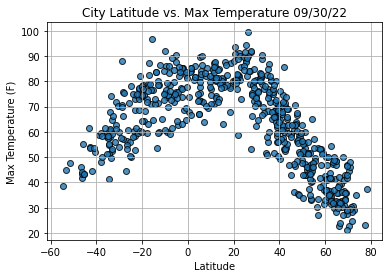

In [13]:


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


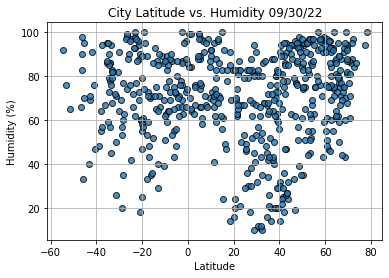

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

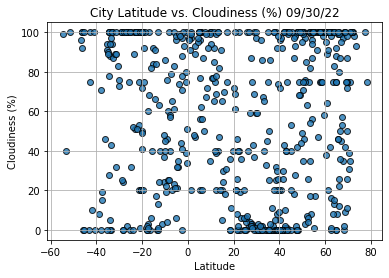

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

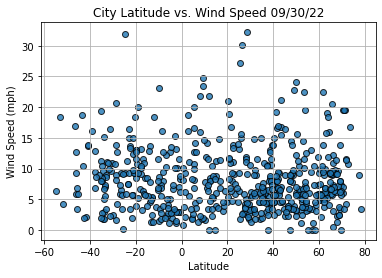

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [31]:
# call the linregress to... do a linear regression calc.
linregress(lats, temps)

LinregressResult(slope=-0.452929121241496, intercept=92.93922548147363, rvalue=-0.7590444753769936, pvalue=0.01089687086168761, stderr=0.13734880392044935, intercept_stderr=6.372784691788096)

In [32]:
# assign the linear regression to a tuple 
# the (slope, intercept, ...) is a tuple.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

In [22]:

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq) 
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [19]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

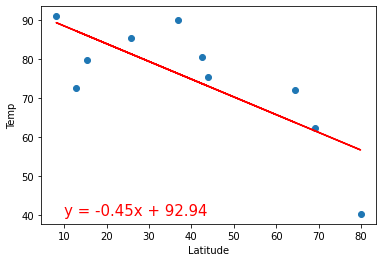

In [20]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [50]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

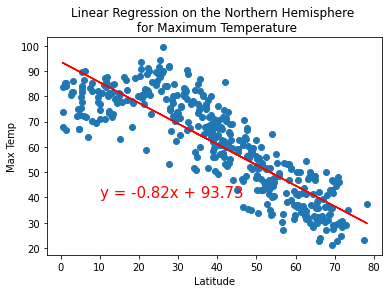

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

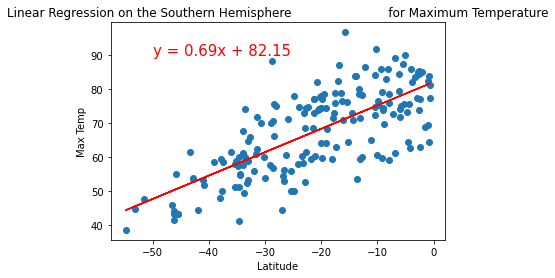

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

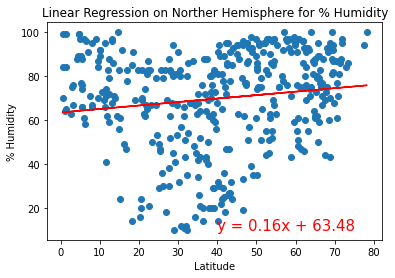

In [62]:
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Humidity"]

plot_linear_regression(x_val, y_val, 'Linear Regression on Norther Hemisphere \
for % Humidity', '% Humidity', (40,10))

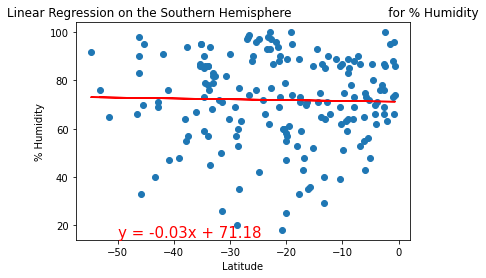

LinregressResult(slope=0.21560300288875892, intercept=45.59869213108049, rvalue=0.10793054862365563, pvalue=0.03155489044438733, stderr=0.09992346263507225, intercept_stderr=4.489062800979616)

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))
linregress(x_val,y_val)

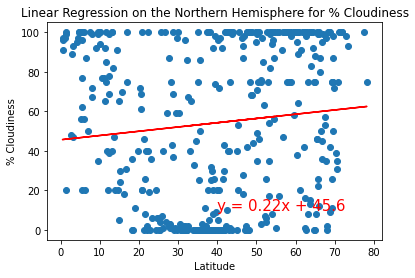

LinregressResult(slope=0.21560300288875892, intercept=45.59869213108049, rvalue=0.10793054862365563, pvalue=0.03155489044438733, stderr=0.09992346263507225, intercept_stderr=4.489062800979616)

In [69]:
# north hem cloudiness off of latitudes
x_val = northern_hemi_df['Lat']
y_val = northern_hemi_df['Cloudiness']


plot_linear_regression(x_val, y_val, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (40,10))
linregress(x_val,y_val)

# 6.5.1

Set up Google Maps and Places API